# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

In [3]:
city = "london"
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={0}&appid={1}".format(city, weather_api_key)
response = requests.get(url)
data = response.json()
data
weather_data = {
    "City": city,
    "Lat": data["coord"]["lat"],
    "Lon": data["coord"]["lon"],
    "Max Temp":data["main"]["temp_max"] ,
    "Humidity":data["main"]["humidity"],
    "Cloudiness":data["clouds"]["all"] , 
    "Wind Speed":data["wind"]["speed"] ,
    "Country":data["sys"]["country"] ,
    "Date":data["dt"] ,
}
weather_data

{'City': 'london',
 'Lat': 51.5085,
 'Lon': -0.1257,
 'Max Temp': 69.01,
 'Humidity': 92,
 'Cloudiness': 20,
 'Wind Speed': 4.61,
 'Country': 'GB',
 'Date': 1623882429}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Processing Data")

city_data = []

for i, city in enumerate(cities):
    try: 
        url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={0}&appid={1}".format(city, weather_api_key)
        response = requests.get(url)
        data = response.json()
        weather_data = {
            "City": city,
            "Lat": data["coord"]["lat"],
            "Lon": data["coord"]["lon"],
            "Max Temp":data["main"]["temp_max"] ,
            "Humidity":data["main"]["humidity"],
            "Cloudiness":data["clouds"]["all"] , 
            "Wind Speed":data["wind"]["speed"] ,
            "Country":data["sys"]["country"] ,
            "Date":data["dt"] ,
        }
        city_data.append(weather_data)
        print("Processing Record {} of Set {} | {}".format(i % 50 + 1, i // 50 + 1, city))
    except:
        print("City {} not found. Skipping...".format(city))


Processing Data
Processing Record 1 of Set 1 | santa cruz
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | fort-shevchenko
Processing Record 12 of Set 1 | aranos
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | neuquen
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | baglung
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | phalodi
Processing Record 23 of Set 1 | hobart
Processing Record 24 of Set 1 | vaini
Proces

Processing Record 2 of Set 5 | kanadey
City mys shmidta not found. Skipping...
Processing Record 4 of Set 5 | abha
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | tabas
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | evansville
Processing Record 9 of Set 5 | myskhako
Processing Record 10 of Set 5 | kolosovka
Processing Record 11 of Set 5 | pavilosta
Processing Record 12 of Set 5 | mabaruma
Processing Record 13 of Set 5 | general pico
Processing Record 14 of Set 5 | lata
Processing Record 15 of Set 5 | semirom
Processing Record 16 of Set 5 | sao filipe
Processing Record 17 of Set 5 | staromyshastovskaya
Processing Record 18 of Set 5 | alice springs
City belushya guba not found. Skipping...
Processing Record 20 of Set 5 | bluff
Processing Record 21 of Set 5 | asosa
Processing Record 22 of Set 5 | ayr
Processing Record 23 of Set 5 | half moon bay
City barentsburg not found. Skipping...
Processing Record 25 of Set 5 | mount gambier
Processi

Processing Record 2 of Set 9 | sattahip
Processing Record 3 of Set 9 | agadir
Processing Record 4 of Set 9 | esna
Processing Record 5 of Set 9 | padang
Processing Record 6 of Set 9 | dawlatabad
Processing Record 7 of Set 9 | bighapur
Processing Record 8 of Set 9 | two hills
Processing Record 9 of Set 9 | sao luiz gonzaga
Processing Record 10 of Set 9 | karasjok
Processing Record 11 of Set 9 | garowe
Processing Record 12 of Set 9 | sept-iles
Processing Record 13 of Set 9 | beringovskiy
Processing Record 14 of Set 9 | agartala
Processing Record 15 of Set 9 | coromandel
Processing Record 16 of Set 9 | progreso
Processing Record 17 of Set 9 | axim
Processing Record 18 of Set 9 | lorengau
Processing Record 19 of Set 9 | bilibino
Processing Record 20 of Set 9 | kununurra
Processing Record 21 of Set 9 | farkaslyuk
Processing Record 22 of Set 9 | zhigansk
Processing Record 23 of Set 9 | barcelos
Processing Record 24 of Set 9 | funadhoo
Processing Record 25 of Set 9 | kyaikkami
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(city_data)
city_data.to_csv(output_data_file)
city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa cruz,-17.8000,-63.1667,68.05,60,75,9.22,BO,1623882618
1,upernavik,72.7868,-56.1549,35.46,88,15,3.31,GL,1623882618
2,constitucion,-35.3333,-72.4167,55.49,83,62,2.35,CL,1623882356
3,mataura,-46.1927,168.8643,40.48,92,93,2.66,NZ,1623882619
4,geraldton,-28.7667,114.6000,48.61,93,0,6.91,AU,1623882367


In [6]:
city_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.330093,13.715725,67.012812,70.494485,56.393382,7.809063,1.623883e+09
std,33.491546,89.994747,15.873385,22.113302,38.795915,5.545863,9.563614e+01
min,-54.800000,-175.200000,31.750000,5.000000,0.000000,0.000000,1.623882e+09
25%,-8.905000,-63.846800,54.345000,58.750000,16.000000,3.830000,1.623883e+09
50%,25.942100,20.696000,68.170000,78.000000,72.000000,6.530000,1.623883e+09
75%,48.895550,90.263325,78.722500,87.000000,95.000000,10.407500,1.623883e+09
max,78.218600,179.316700,116.620000,100.000000,100.000000,27.960000,1.623883e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
drop_index = city_data[city_data["Humidity"] > 100].index
drop_index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = city_data.drop(drop_index, inplace=False)
city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa cruz,-17.8000,-63.1667,68.05,60,75,9.22,BO,1623882618
1,upernavik,72.7868,-56.1549,35.46,88,15,3.31,GL,1623882618
2,constitucion,-35.3333,-72.4167,55.49,83,62,2.35,CL,1623882356
3,mataura,-46.1927,168.8643,40.48,92,93,2.66,NZ,1623882619
4,geraldton,-28.7667,114.6000,48.61,93,0,6.91,AU,1623882367


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

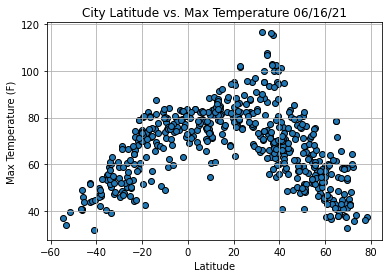

In [9]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Max Temp"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs. Max Temperature {}".format(time.strftime("%x")))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/lat_vs_temp.png")

plt.show()

This scatter plot is about the City Latitude vs. the Max Temperature. This show that there is a relationship and the temperature goes up when the latter goes to zero.

## Latitude vs. Humidity Plot

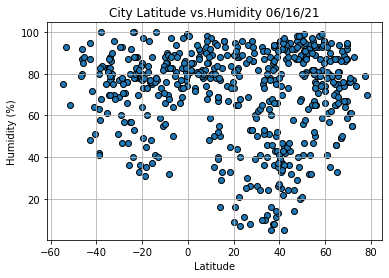

In [10]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Humidity"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Humidity {}".format(time.strftime("%x")))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_humidity.png")

plt.show()

This scatter plot is about the City Latitude vs. the Humidity as the Latitude is between 20 to 40 and the Humidity is between zero to 40.

## Latitude vs. Cloudiness Plot

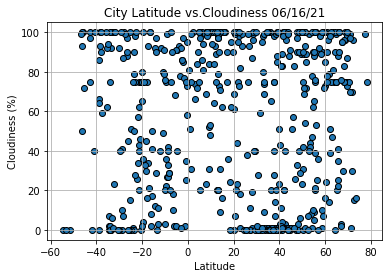

In [11]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Cloudiness"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Cloudiness {}".format(time.strftime("%x")))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_cloudiness.png")

plt.show()

This scatter plot is about the City Latitude vs. the Cloudiness is more cloudy for Latitude less than zero and more than 20.

## Latitude vs. Wind Speed Plot

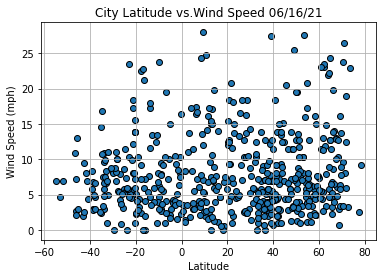

In [12]:
plt.scatter(x=city_data["Lat"],
            y=city_data["Wind Speed"],
            edgecolor="black",
            label="Cities"
           )
plt.title("City Latitude vs.Wind Speed {}".format(time.strftime("%x")))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("output_data/lat_vs_wind speed.png")

plt.show()

This scatter plot is about the City Latitude vs. the Wind Speed. The Wind Speed increasing as the Latitude is increasing beyond Zero. 

## Linear Regression

In [13]:
def linear_regression(x, y, x_title, y_title, text_coordinates):
    (m, b, r, p, err) = linregress(x, y)
    regress_value = x * m + b
    line_eq = "y = {}x + {}".format(round(m , 2), round(b, 2))
    
    plt.scatter(x, y)
    plt.plot(x, regress_value, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    print("The R-value is {}".format(r ** 2))
    plt.show()
    

In [14]:
northern_data = city_data.loc[city_data["Lat"] >= 0]
southern_data = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.44810417511460426


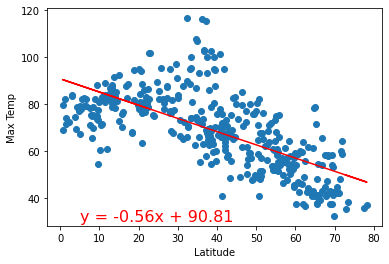

In [15]:
linear_regression(northern_data["Lat"], northern_data["Max Temp"], "Latitude", "Max Temp", (5, 30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-value is 0.6481610880375857


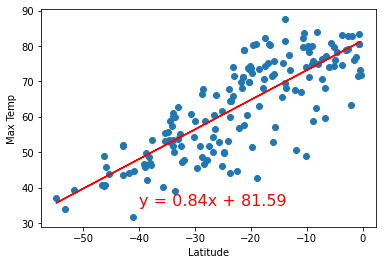

In [16]:
linear_regression(southern_data["Lat"], southern_data["Max Temp"], "Latitude", "Max Temp", (-40, 35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.0005032898983782299


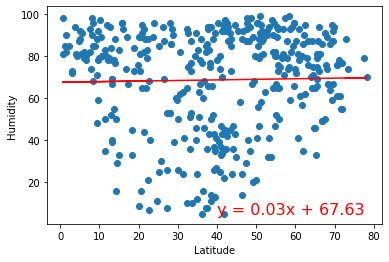

In [17]:
linear_regression(northern_data["Lat"], northern_data["Humidity"], "Latitude", "Humidity", (40, 5))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-value is 0.0016950333532149962


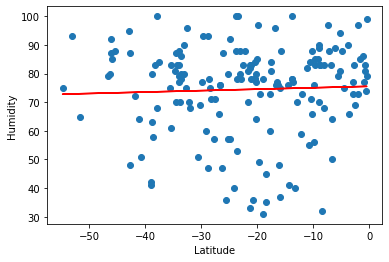

In [18]:
linear_regression(southern_data["Lat"], southern_data["Humidity"], "Latitude", "Humidity", (-50, 25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.0028075605925167975


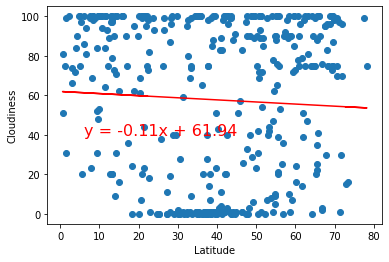

In [19]:
linear_regression(northern_data["Lat"], northern_data["Cloudiness"], "Latitude", "Cloudiness", (6, 40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-value is 0.0007526207171975063


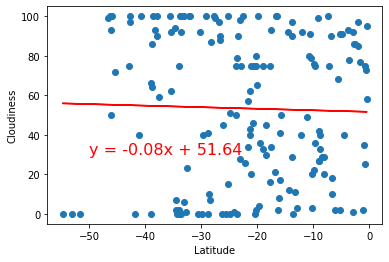

In [20]:
linear_regression(southern_data["Lat"], southern_data["Cloudiness"], "Latitude", "Cloudiness", (-50, 30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.004930726015841703


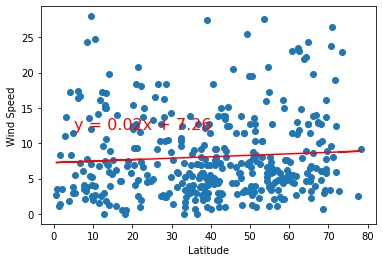

In [21]:
linear_regression(northern_data["Lat"], northern_data["Wind Speed"], "Latitude", "Wind Speed", (5, 12))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-value is 0.004286988437280098


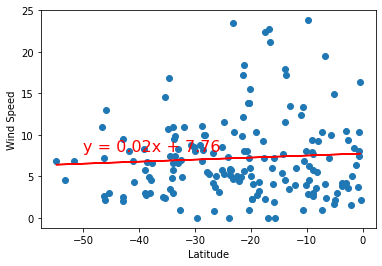

In [22]:
linear_regression(southern_data["Lat"], southern_data["Wind Speed"], "Latitude", "Wind Speed", (-50, 8))